# Naive-Bayes dengan data Visit-Nominal.csv

### 1. Inisialisasikan library yang diperlukan untuk dataset ini.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport


### 2. Masukan dataset Visit-Nominal.csv kedalam dataframe

In [2]:
df = pd.read_csv("\\Users\\aftermath\\Documents\\Machine Learning\\Visit-Nominal.csv",header=None, skipinitialspace=True)
attrs = []
for attr in range(7):
    attrs.append(df.at[0,attr])

dfnew = pd.read_csv("\\Users\\aftermath\\Documents\\Machine Learning\\Visit-Nominal.csv",header=None, skipinitialspace=True, skiprows = 1)
dfnew.columns = attrs

dfnew.head()

,Home,Browsed,Searched,Prod_A,Prod_B,Prod_C,Visit_Again
0,yes,no,no,no,no,no,no
1,yes,yes,yes,no,no,no,no
2,yes,no,no,no,no,no,no
3,yes,yes,yes,yes,no,no,yes
4,yes,no,yes,yes,yes,no,yes


In [3]:
print(dfnew.describe())

       Home Browsed Searched Prod_A Prod_B Prod_C Visit_Again
count   100     100      100    100    100    100         100
unique    2       2        2      2      2      2           2
top     yes     yes       no    yes    yes     no          no
freq     60      72       57     53     55     55          61



### 3. Representasikan data 'yes' dan 'no' kedalam bentuk biner '1' dan '0'

In [4]:
toBinary = lambda x: 1 if x=="yes" else 0
dfnew = dfnew.applymap(toBinary)

 
### 4. Cek apakah terdapat value fitur yang kosong

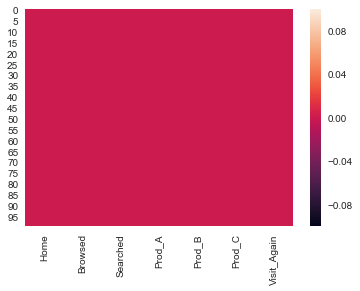

In [5]:
missing_values = dfnew.isnull()
missing_values

sns.heatmap(data = missing_values)


### 5. Lihat perbandingan jumlah class 0 dan 1

0    61
1    39
Name: Visit_Again, dtype: int64

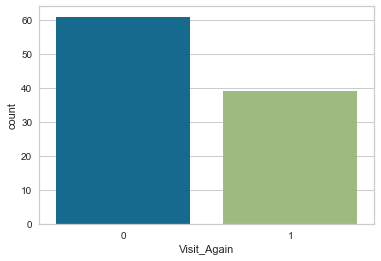

In [6]:
sns.countplot(x='Visit_Again', data=dfnew)
dfnew.Visit_Again.value_counts()


### 6. Siapkan data untuk training secara biasa dan training dengan cross validation

In [7]:
feature = attrs
feature.pop()
feature

['Home', 'Browsed', 'Searched', 'Prod_A', 'Prod_B', 'Prod_C']

In [8]:
features = dfnew[feature]
label = dfnew['Visit_Again']